In [1]:
using Gadfly
using Vec, LinearAlgebra
using GridWorldPathFollowing

┌ Info: Recompiling stale cache file /Users/kyle/.julia/compiled/v1.0/Gadfly/DvECm.ji for Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004]
└ @ Base loading.jl:1190


In [30]:
start_pt = VecE2(0.0,0.0)
start_time = 0.0
action_sequence = [WAIT,WAIT,LEFT,LEFT,UP,UP,WAIT,RIGHT,WAIT,UP,RIGHT,LEFT,UP,WAIT,LEFT,WAIT]
cell_width = 1.0
transition_time = 1.0
grid_path = construct_grid_world_path(start_pt,start_time,
    action_sequence,cell_width,transition_time)

traj = construct_trajectory(grid_path)
verify(traj)

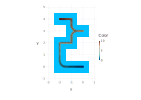

In [42]:
Δt = 0.01
t_range = get_start_time(traj):Δt:get_end_time(traj)
t_color_range = get_start_time(traj):(10*Δt):get_end_time(traj)
pad = 0.01
plot(
    layer(
        x=[get_position(traj,t).x for t in t_range],
        y=[get_position(traj,t).y for t in t_range],
        Geom.path,
        Theme(default_color="black")
        ),
    layer(
        x=[get_position(traj,t).x for t in t_color_range],
        y=[get_position(traj,t).y for t in t_color_range],
        color=[get_dist(traj,t) for t in t_color_range],
        Geom.point
        ),
    layer(
        xmin=[w.pt.x - grid_path.cellwidth/2 for w in grid_path.waypoints] .+ pad,
        xmax=[w.pt.x + grid_path.cellwidth/2 for w in grid_path.waypoints] .- pad,
        ymin=[w.pt.y - grid_path.cellwidth/2 for w in grid_path.waypoints] .+ pad,
        ymax=[w.pt.y + grid_path.cellwidth/2 for w in grid_path.waypoints] .- pad,
        Geom.rect
    ),
    Coord.cartesian(fixed=true)
)

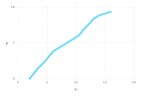

In [43]:
plot(x=collect(t_color_range),y=[get_dist(traj,t) for t in t_color_range])